# **데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np

path = './data/'

train=pd.read_csv(path + 'train_features.csv')
train_labels=pd.read_csv(path + 'train_labels.csv')
test=pd.read_csv(path + 'test_features.csv')
submission=pd.read_csv(path + 'sample_submission.csv')

# **데이터 살펴보기**

In [2]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [3]:
#id 별로 각각 600개의 데이터가 있음을 확인   
train['id'].value_counts()

0       600
2731    600
2722    600
675     600
1699    600
       ... 
2379    600
1354    600
2378    600
331     600
2047    600
Name: id, Length: 3125, dtype: int64

In [4]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


<AxesSubplot:>

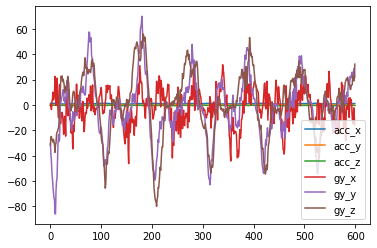

In [5]:
#id 별 동작들의 흐름 살펴보기
ex=train[train['id']==0]
ex.iloc[:,2:].plot()

<AxesSubplot:>

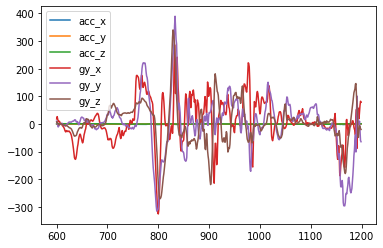

In [6]:
ex=train[train['id']==1]
ex.iloc[:,2:].plot()

<AxesSubplot:>

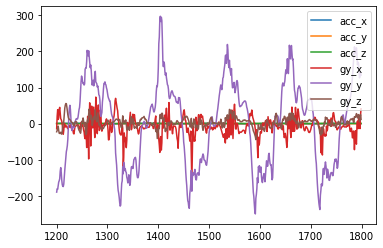

In [7]:
ex=train[train['id']==2]
ex.iloc[:,2:].plot()

<AxesSubplot:>

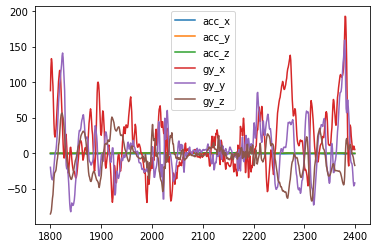

In [8]:
ex=train[train['id']==3]
ex.iloc[:,2:].plot()

In [9]:
#test'id'는 782개 
test['id'].nunique()

782

In [10]:
#782개의 id 별 동작 데이터를 활용해 각각의id가 어떤 동작인지를 분류하는 문제!!
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **라이브러리 불러오기**

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# **데이터 수정**

In [13]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [14]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

# **모델 학습 및 예측**

In [15]:
#가벼운 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Train on 2500 samples, validate on 625 samples
Epoch 1/30
2500/2500 [==============================] - 728s 291ms/sample - loss: 3.7045 - accuracy: 0.3656 - val_loss: 3.2307 - val_accuracy: 0.4976
Epoch 2/30
2500/2500 [==============================] - 1s 242us/sample - loss: 3.0023 - accuracy: 0.4828 - val_loss: 2.7842 - val_accuracy: 0.4976
Epoch 3/30
2500/2500 [==============================] - 1s 245us/sample - loss: 2.7622 - accuracy: 0.4828 - val_loss: 2.7084 - val_accuracy: 0.4976
Epoch 4/30
2500/2500 [==============================] - 1s 247us/sample - loss: 2.6885 - accuracy: 0.4828 - val_loss: 2.6815 - val_accuracy: 0.4976
Epoch 5/30
2500/2500 [==============================] - 1s 241us/sample - loss: 2.6387 - accuracy: 0.4828 - val_loss: 2.6596 - val_accuracy: 0.4976
Epoch 6/30
2500/2500 [==============================] - 1s 251us/sample - loss: 2.5905 - accuracy: 0.4828 - val_loss: 2.6306 - val_accuracy: 0.4976
Epoch 7/30
2500/2500 [==============================] - 1s 239u

In [17]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [18]:
prediction=model.predict(test_X)

In [19]:
prediction.shape

(782, 61)

# **제출**

In [20]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
submission.iloc[:,1:]=prediction

In [22]:
submission

,id,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,3125,0.000440,0.005517,0.000345,0.001039,0.017079,0.002742,0.030596,0.007241,0.000195,...,0.002082,0.001106,0.000235,0.003100,0.000467,0.001071,0.009373,0.002609,0.003480,0.001331
1,3126,0.001261,0.008139,0.000172,0.001552,0.015357,0.001420,0.014881,0.010252,0.001074,...,0.000160,0.001629,0.000242,0.002468,0.000431,0.001727,0.005377,0.002209,0.009051,0.001486
2,3127,0.000618,0.000699,0.000298,0.000129,0.005104,0.000289,0.001220,0.010993,0.001521,...,0.001900,0.000881,0.000017,0.000066,0.000480,0.000305,0.001149,0.006700,0.000461,0.001720
3,3128,0.001499,0.007663,0.000332,0.001818,0.006666,0.001479,0.009657,0.009174,0.015411,...,0.004961,0.010205,0.000344,0.006784,0.000559,0.001013,0.004624,0.005812,0.007539,0.052910
4,3129,0.000881,0.001639,0.000468,0.000325,0.007153,0.000927,0.002507,0.010621,0.008563,...,0.002934,0.005451,0.000064,0.000167,0.000963,0.000655,0.001746,0.012180,0.001272,0.011594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.000489,0.005641,0.003596,0.002830,0.022081,0.003574,0.009648,0.003991,0.000041,...,0.003970,0.000590,0.000970,0.004655,0.003457,0.001359,0.014029,0.006654,0.011983,0.000346
778,3903,0.011702,0.004053,0.000738,0.000463,0.010517,0.001476,0.001457,0.008072,0.002590,...,0.008800,0.003698,0.000282,0.000595,0.001130,0.001441,0.008505,0.023199,0.009418,0.002758
779,3904,0.000979,0.000533,0.000262,0.000189,0.002921,0.002158,0.003110,0.004223,0.000294,...,0.001608,0.000221,0.000098,0.000214,0.000127,0.001585,0.000970,0.000872,0.000231,0.000109
780,3905,0.003738,0.007430,0.034491,0.076193,0.002406,0.003854,0.001104,0.000992,0.001080,...,0.015622,0.000152,0.013014,0.137082,0.022306,0.001909,0.002876,0.019825,0.009985,0.000044


In [23]:
submission.to_csv('baseline_submission.csv', index=False)